In [1]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001UJEN6C,A2LFHPZFG1OHBZ,Joanna Capello-Paul,2,3,5,1320451200,Best energy shot I have ever tasted!,I first found Steaz Berry Energy Shots at a lo...
1,2,B001UJEN6C,A297HRGWRID7I6,Mariza R Barnes,0,0,5,1347321600,The Best,I have tried other energy shots and this one i...
2,3,B001UJEN6C,AMYAHFQZI19LS,longlivedave,0,0,5,1345680000,Tested by a trucker,I drive OTR...Over the Road truck and this hel...
3,4,B001UJEN6C,A28VTF9FQ42SBV,jeremygiesel,0,0,5,1344729600,Good Stuff,"Products takes pretty good, and it doesn't lea..."
4,5,B001UJEN6C,A2H03V8PAZDU9J,LMPGAP,0,0,5,1339200000,Great energy drink without artificial ingredients,"I use this product daily, and it provides a st..."


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabjo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


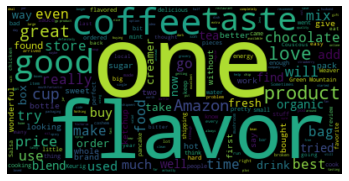

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('picturetxt.png')
plt.show()

In [4]:
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001UJEN6C,A2LFHPZFG1OHBZ,Joanna Capello-Paul,2,3,5,1320451200,Best energy shot I have ever tasted!,I first found Steaz Berry Energy Shots at a lo...,1
1,2,B001UJEN6C,A297HRGWRID7I6,Mariza R Barnes,0,0,5,1347321600,The Best,I have tried other energy shots and this one i...,1
2,3,B001UJEN6C,AMYAHFQZI19LS,longlivedave,0,0,5,1345680000,Tested by a trucker,I drive OTR...Over the Road truck and this hel...,1
3,4,B001UJEN6C,A28VTF9FQ42SBV,jeremygiesel,0,0,5,1344729600,Good Stuff,"Products takes pretty good, and it doesn't lea...",1
4,5,B001UJEN6C,A2H03V8PAZDU9J,LMPGAP,0,0,5,1339200000,Great energy drink without artificial ingredients,"I use this product daily, and it provides a st...",1


In [6]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

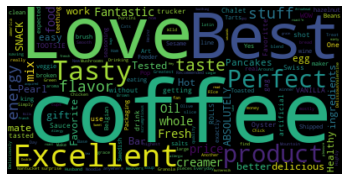

In [7]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
pos = ",".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

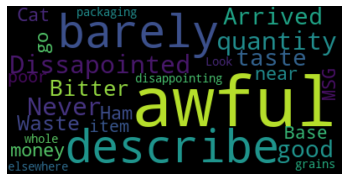

In [8]:
stopwords = set(STOPWORDS)
neg = ','.join([str(review) for review in negative.Summary])
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudneg.png')
plt.show()

In [9]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [10]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [11]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Best energy shot I have ever tasted,1
1,The Best,1
2,Tested by a trucker,1
3,Good Stuff,1
4,Great energy drink without artificial ingredients,1


In [12]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [15]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']


In [17]:
lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
predictions = lr.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 0,  0],
       [ 2, 20]], dtype=int64)

In [20]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.91      0.95        22

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22



C:\Users\gabjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\gabjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\gabjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

